3b) risolvere l'esercizio come classificatore binario solo sport & politics

In [1]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/bbc-data.csv
#(usare pipeline SpaCy)

--2022-04-16 11:37:52--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/bbc-data.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.38
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3351206 (3.2M) [text/csv]
Saving to: ‘bbc-data.csv’

bbc-data.csv        100%[===================>]   3.20M  5.80MB/s    in 0.6s    

2022-04-16 11:37:52 (5.80 MB/s) - ‘bbc-data.csv’ saved [3351206/3351206]



In [2]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bbc-data.csv')
df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [4]:
df.shape

(1490, 3)

In [5]:
df['Text'].to_list()

Output hidden; open in https://colab.research.google.com to view.

In [6]:
df['Text'].isnull().sum()

0

In [ ]:
#df = df.dropna()

#Data Cleaning

In [7]:
import re

def clean_special_patterns(text):
    """Remove special patterns - email, url, date etc."""
    html_regex = re.compile(r"<.*?>")
    email_regex = re.compile(r"[\w.-]+@[\w.-]+")
    url_regex = re.compile(r"(http|www)[^\s]+")
    date_regex = re.compile(r"[\d]{2,4}[ -/:]*[\d]{2,4}([ -/:]*[\d]{2,4})?") # a way to match date
    new_line = re.compile(r"/(\r\n)+|\r+|\n+|\t+/")
    number = re.compile(r"[\d+]")
    under = re.compile(r"[^a-zA-Z0-9:$-,%.?!]+")
    simbols = re.compile(r"[^\w\s/'/`]")
    spaces = re.compile(r"\s{2,}")
    remove_singlelett= re.compile(r"(^| ).( |$)")

    ## remove
    text = text.lower()
    text = number.sub(" ", text)
    text = html_regex.sub(" ", text)
    text = url_regex.sub(" ", text)
    text = email_regex.sub(" ", text)
    text = date_regex.sub(" ", text)
    text = new_line.sub(" ", text)
    text = under.sub(" ", text)
    text = simbols.sub(" ", text)
    text = spaces.sub(" ", text)
    text = text.replace("`", "'")
    text = remove_singlelett.sub("",text)
    return text

#Cleaning AllinOne

In [8]:
#Applichiamo la funzione di cleaning all in once
df["Text"] = df["Text"].apply(clean_special_patterns)
df

,ArticleId,Text,Category
0,1833,worldcom ex boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens inm...,business
3,1976,lifestyle governs mobile choice faster better ...,tech
4,917,enron bosses inpayout eighteen former enron di...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [10]:
cond1 = ['sport','politics']

In [11]:
filtered_df = df[df['Category'].isin(cond1)]
print(filtered_df)

      ArticleId                                               Text  Category
5          1582  howard truanted to play snooker conservative l...  politics
6           651  wales silent on grand slam talk rhys williams ...     sport
10         1683  blair rejects iraq advice calls tony blair has...  politics
14          707  ireland argentina an injury time dropped goal ...     sport
15         1588  wenger signs new deal arsenal manager arsene w...     sport
...         ...                                                ...       ...
1472       1806  kelly trails new discipline power teachers cou...  politics
1473        304  dallaglio eyeing lions tour place former engla...     sport
1475        980  budget to set scene for election gordon brown ...  politics
1478       1144  visa row mandarin made sir john the top civil ...  politics
1481        950  liverpool pledge to keep gerrard liverpool chi...     sport

[620 rows x 3 columns]


In [12]:
df = filtered_df

In [13]:
df.shape

(620, 3)

In [14]:
df['Category'].value_counts()

sport       346
politics    274
Name: Category, dtype: int64

In [16]:
df["Category"] = df["Category"].replace({'sport':0,'politics':1})
df = df[['Text','Category']]
df

,Text,Category
5,howard truanted to play snooker conservative l...,1
6,wales silent on grand slam talk rhys williams ...,0
10,blair rejects iraq advice calls tony blair has...,1
14,ireland argentina an injury time dropped goal ...,0
15,wenger signs new deal arsenal manager arsene w...,0
...,...,...
1472,kelly trails new discipline power teachers cou...,1
1473,dallaglio eyeing lions tour place former engla...,0
1475,budget to set scene for election gordon brown ...,1
1478,visa row mandarin made sir john the top civil ...,1


#STOPWORDS + LEMMATIZATION Function with SpaCy

In [17]:
## Spacy Custom Pipeline
import numpy as np
import multiprocessing as mp

import string
import spacy 
from sklearn.base import TransformerMixin, BaseEstimator


nlp = spacy.load("en_core_web_sm")

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self,
                 nlp = nlp,
                 n_jobs=1):
        """
        Text preprocessing transformer includes steps:
            1. Punctuation removal
            2. Stop words removal
            3. Lemmatization

        nlp  - spacy model
        n_jobs - parallel jobs to run
        """
        self.nlp = nlp
        self.n_jobs = n_jobs

    def fit(self, X, y=None):
        return self

    def transform(self, X, *_):
        X_copy = X.copy()

        partitions = 1
        cores = mp.cpu_count()
        if self.n_jobs <= -1:
            partitions = cores
        elif self.n_jobs <= 0:
            return X_copy.apply(self._preprocess_text)
        else:
            partitions = min(self.n_jobs, cores)

        data_split = np.array_split(X_copy, partitions)
        pool = mp.Pool(cores)
        data = pd.concat(pool.map(self._preprocess_part, data_split))
        pool.close()
        pool.join()

        return data

    def _preprocess_part(self, part):
        return part.apply(self._preprocess_text)

    def _remove_punct(self, doc):
        return (t for t in doc if t.text not in string.punctuation)

    def _remove_stop_words(self, doc):
        return (t for t in doc if not t.is_stop)

    def _lemmatize(self, doc):
        return ' '.join(t.lemma_ for t in doc)

    def _preprocess_text(self, text):
        doc = self.nlp(text)
        removed_punct = self._remove_punct(doc)
        removed_stop_words = self._remove_stop_words(removed_punct)
        return self._lemmatize(removed_stop_words)

In [18]:
#takes 2 min of processing
text_preprocess = TextPreprocessor(n_jobs=-1)._preprocess_text
#df["text"][0:10].apply(text_preprocess)
df["Text"] = df["Text"].apply(text_preprocess)
df

,Text,Category
5,howard truante play snooker conservative leade...,1
6,wales silent grand slam talk rhys williams say...,0
10,blair reject iraq advice call tony blair rejec...,1
14,ireland argentina injury time drop goal ronang...,0
15,wenger sign new deal arsenal manager arsene we...,0
...,...,...
1472,kelly trail new discipline power teacher power...,1
1473,dallaglio eye lion tour place england captain ...,0
1475,budget set scene election gordon brown seek ec...,1
1478,visa row mandarin sir john civil servant centr...,1


#EDA

In [19]:
cleaned = ' '.join(df['Text'].to_list())

(-0.5, 799.5, 399.5, -0.5)

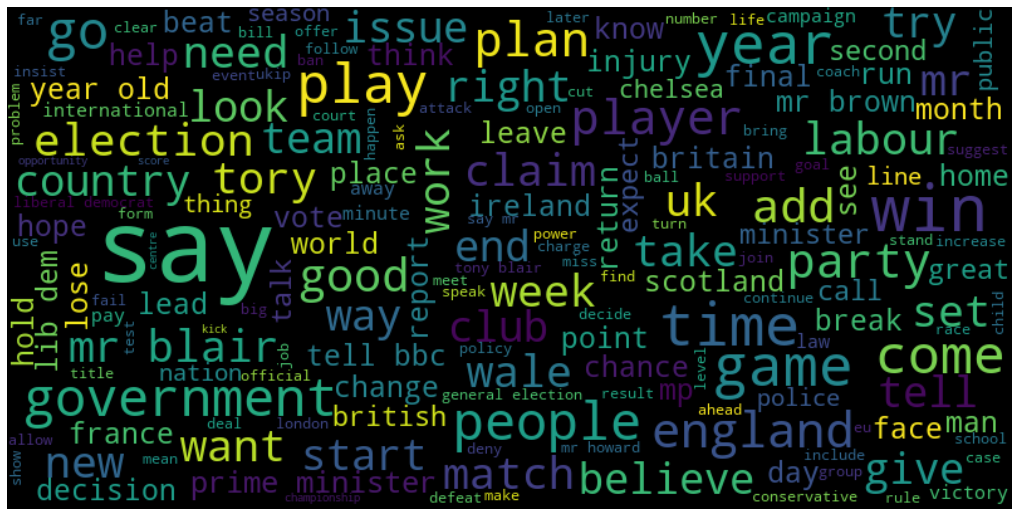

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      random_state = 667)

wordcloud.generate(cleaned)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

#Bag of Words

In [21]:
X = df['Text'] # FEATURES
y = df['Category'] # TARGET

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)

X_ = vectorizer.fit_transform(X).toarray()
X_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_ = tfidfconverter.fit_transform(X_).toarray()
X_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [25]:
labels = ['sport', 'politics']

#RandomForest

In [26]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=667)

In [27]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9935483870967742


Text(69.0, 0.5, 'Actual')

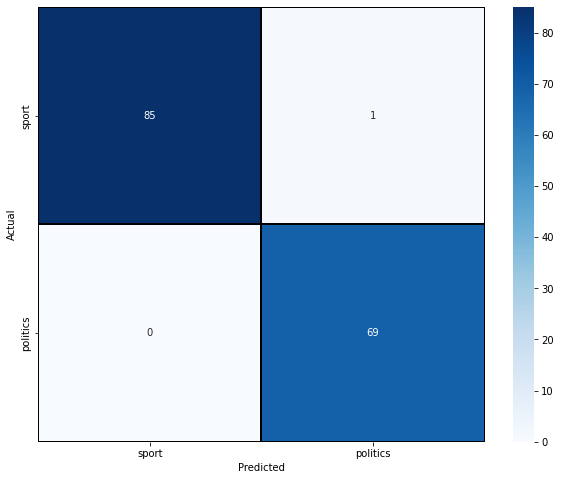

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

       sport       1.00      0.99      0.99        86
    politics       0.99      1.00      0.99        69

    accuracy                           0.99       155
   macro avg       0.99      0.99      0.99       155
weighted avg       0.99      0.99      0.99       155



In [30]:
!pip install plot-metric --quiet

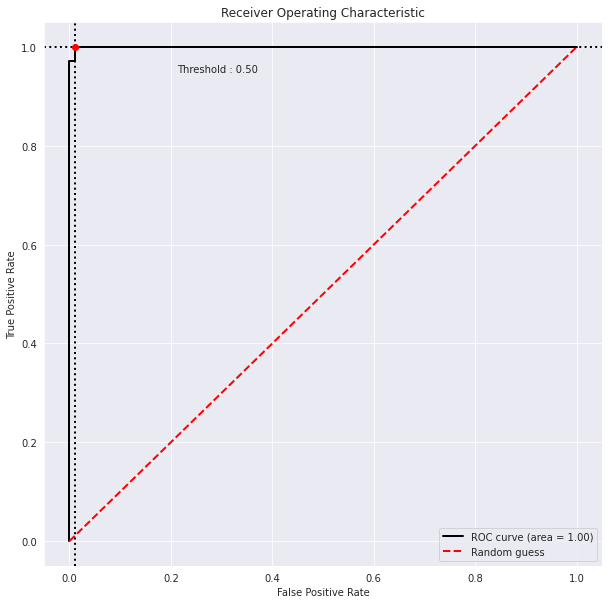

In [31]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

#MultinomialNB

In [32]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [33]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9935483870967742


Text(69.0, 0.5, 'Actual')

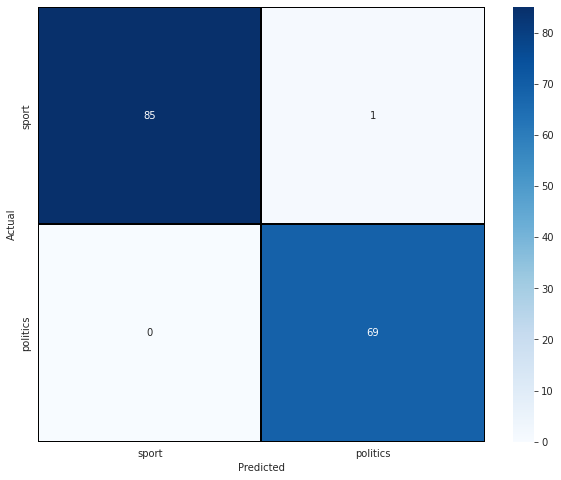

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [36]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

       sport       1.00      0.99      0.99        86
    politics       0.99      1.00      0.99        69

    accuracy                           0.99       155
   macro avg       0.99      0.99      0.99       155
weighted avg       0.99      0.99      0.99       155



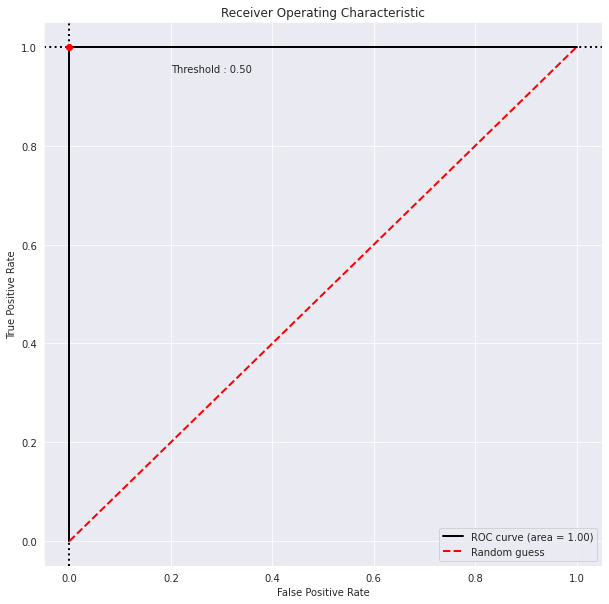

In [37]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

#SGD Classifier

In [38]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9935483870967742


Text(69.0, 0.5, 'Actual')

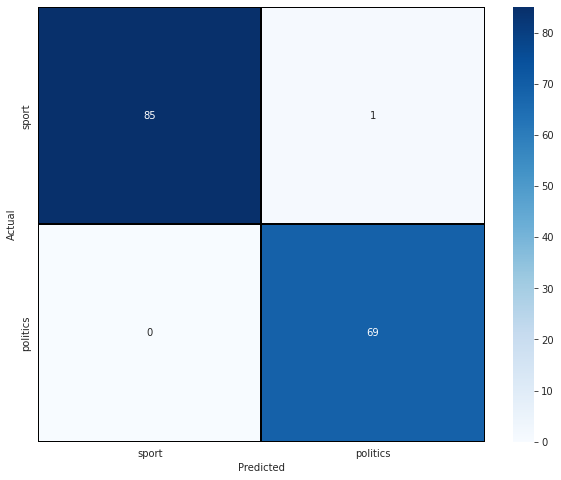

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [40]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

       sport       1.00      0.99      0.99        86
    politics       0.99      1.00      0.99        69

    accuracy                           0.99       155
   macro avg       0.99      0.99      0.99       155
weighted avg       0.99      0.99      0.99       155



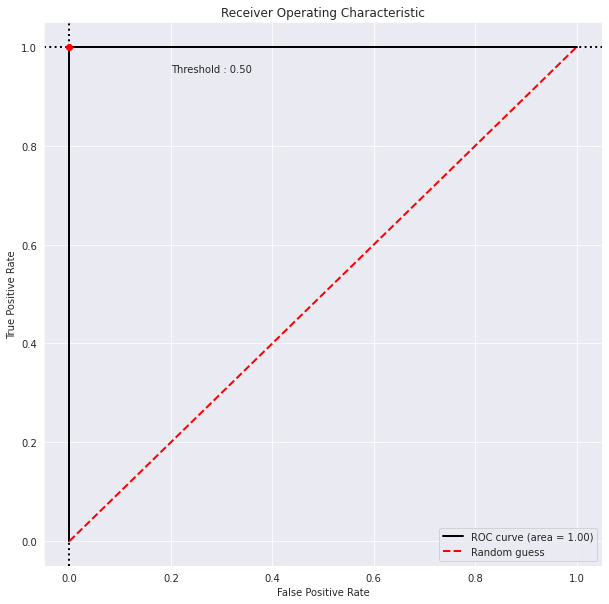

In [41]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

#Pipeline

In [42]:
# X = features raw on text format
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [43]:
from sklearn.pipeline import Pipeline

text_preprocess = TextPreprocessor(n_jobs=-1)
bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
classifier = MultinomialNB()

pipe = Pipeline([
                ('lemma_stop_rem',text_preprocess),
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',classifier),
                ])

pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)
test_data_accuracy = accuracy_score(y_test,predicted)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9935483870967742


In [44]:
test = pd.Series({'text':'wales silent on grand slam talk rhys williams says wales are still not thinking of winning the grand slam despite third six nations win'})

In [45]:
prediction = pipe.predict(test)
print(prediction[0])

if (prediction[0] == 0):
  print('sport')
else:
  print('politics')

0
sport


In [46]:
import joblib

joblib.dump(pipe,'pipeline_sport|politics.pkl')

['pipeline_sport|politics.pkl']